In [22]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Configuración para gráficos
sns.set(style="whitegrid")

In [24]:
df_consolidado = pd.read_csv("datos_consolidados.csv", sep=';', encoding='utf-8')

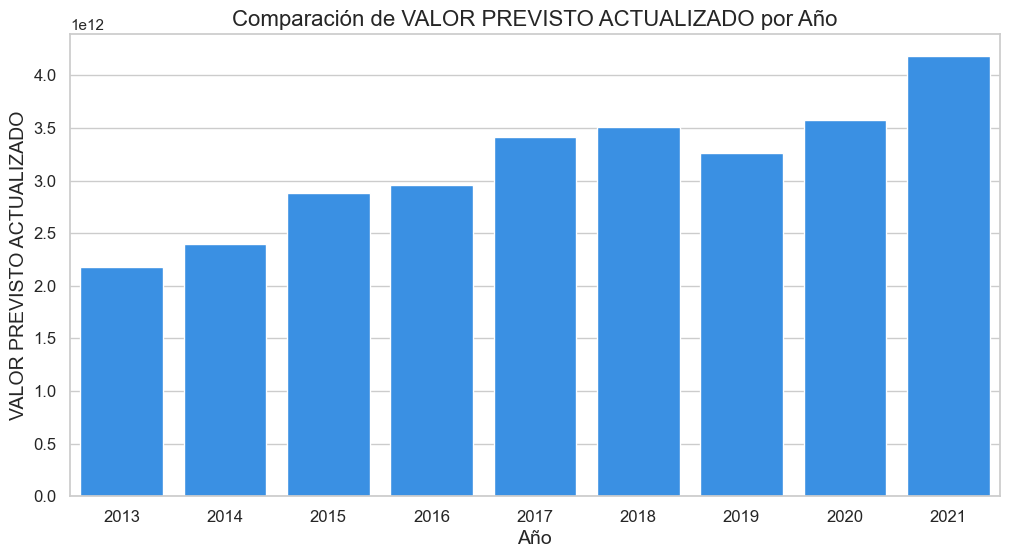

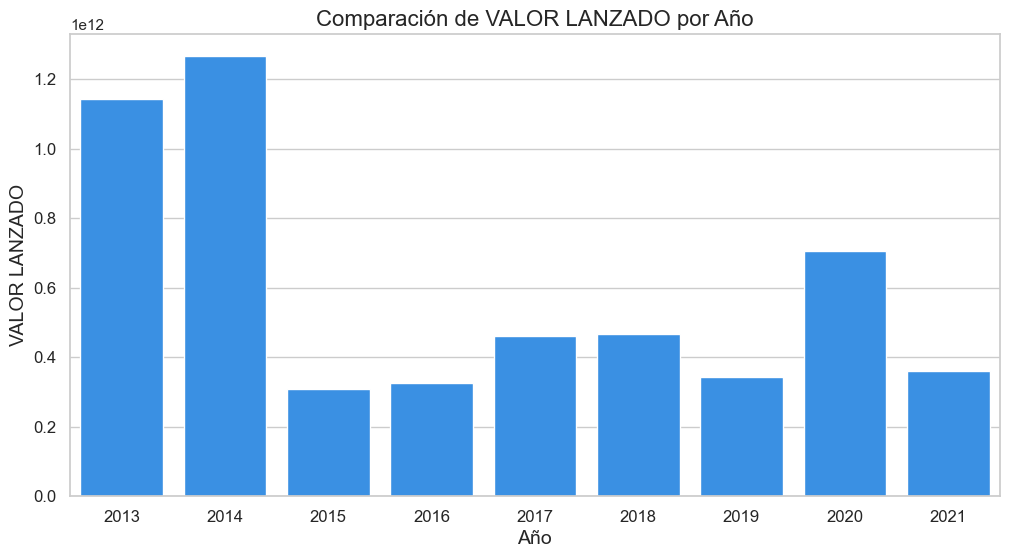

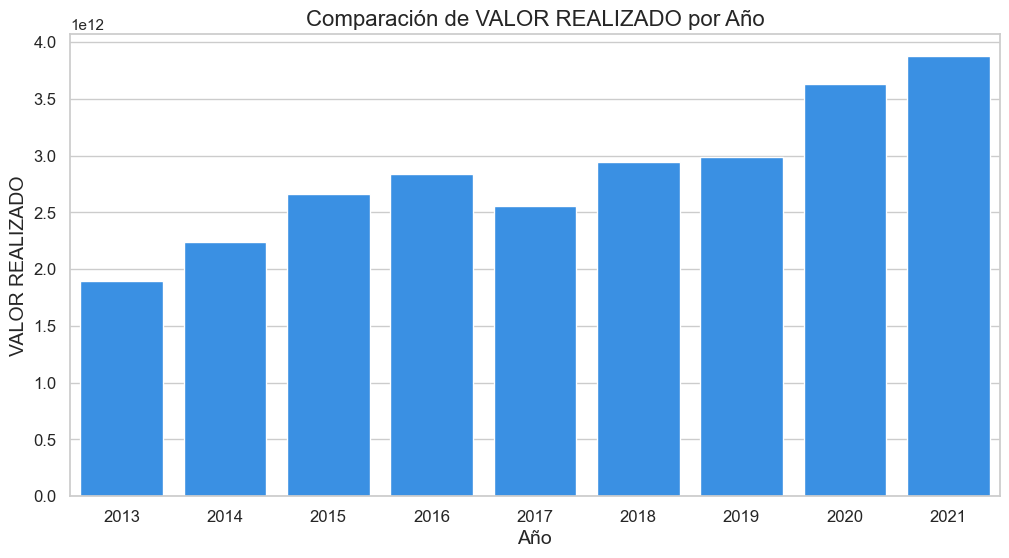

In [25]:
# Gráficos de barras para comparar valores previstos, lanzados y realizados
variables_comparacion = ['VALOR PREVISTO ACTUALIZADO', 'VALOR LANZADO', 'VALOR REALIZADO']

df_comparacion = df_consolidado.groupby('AÑO EJERCICIO')[variables_comparacion].sum().reset_index()

for var in variables_comparacion:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='AÑO EJERCICIO', y=var, data=df_comparacion, color="dodgerblue")
    plt.title(f"Comparación de {var} por Año", fontsize=16)
    plt.xlabel("Año", fontsize=14)
    plt.ylabel(var, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


- Los valores realizados muestran una tendencia al alza constante desde 2013 hasta 2021, alcanzando su máximo en 2021.
- Los valores lanzados muestran fluctuaciones importantes, con un pico significativo en 2014 y una caída sustancial en 2019 y 2021.
- Los valores previstos se mantienen relativamente estables con incrementos moderados, alcanzando también su máximo en 2021.

Se observa un incremento constante en los valores realizados desde 2013 hasta 2021. Este crecimiento puede reflejar una mayor capacidad del gobierno para recaudar ingresos a lo largo del tiempo.
Sin embargo, es necesario considerar si este aumento se alinea con el crecimiento económico del país y las proyecciones fiscales establecidas.

El año 2014 destaca con un pico en los valores lanzados, lo cual podría estar relacionado con políticas específicas o iniciativas gubernamentales excepcionales. Por el contrario, en años como 2019 y 2021, los valores lanzados son notablemente más bajos, lo que podría reflejar ajustes presupuestarios o restricciones administrativas.

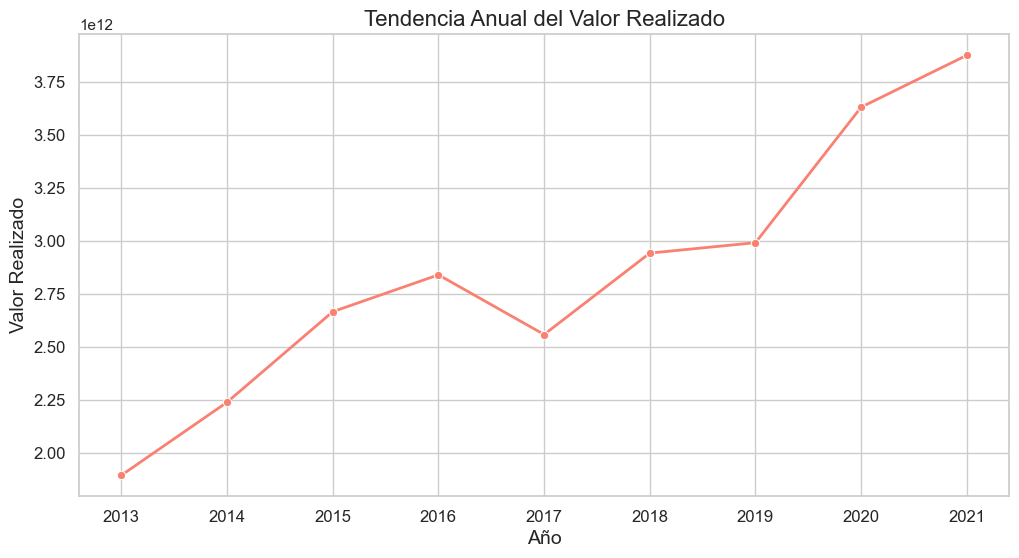

In [26]:
# Líneas de tiempo para observar tendencias anuales y mensuales
# Tendencias anuales
df_tendencias = df_consolidado.groupby('AÑO EJERCICIO')['VALOR REALIZADO'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='AÑO EJERCICIO', y='VALOR REALIZADO', data=df_tendencias, marker="o", linewidth=2, color="salmon")
plt.title("Tendencia Anual del Valor Realizado", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Valor Realizado", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Tendencia anual: Existe un crecimiento constante en los valores realizados a lo largo de los años, con algunas fluctuaciones en 2017 y 2018.


Aunque el crecimiento general de los valores realizados es evidente, años como 2017 presentan una desaceleración. Esto podría indicar factores externos, como cambios en políticas fiscales, recesiones económicas o fluctuaciones internacionales.

C:\Users\victo\AppData\Local\Temp\ipykernel_5508\4249285841.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_consolidado['MES'] = pd.to_datetime(df_consolidado['FECHA LANZAMIENTO']).dt.month


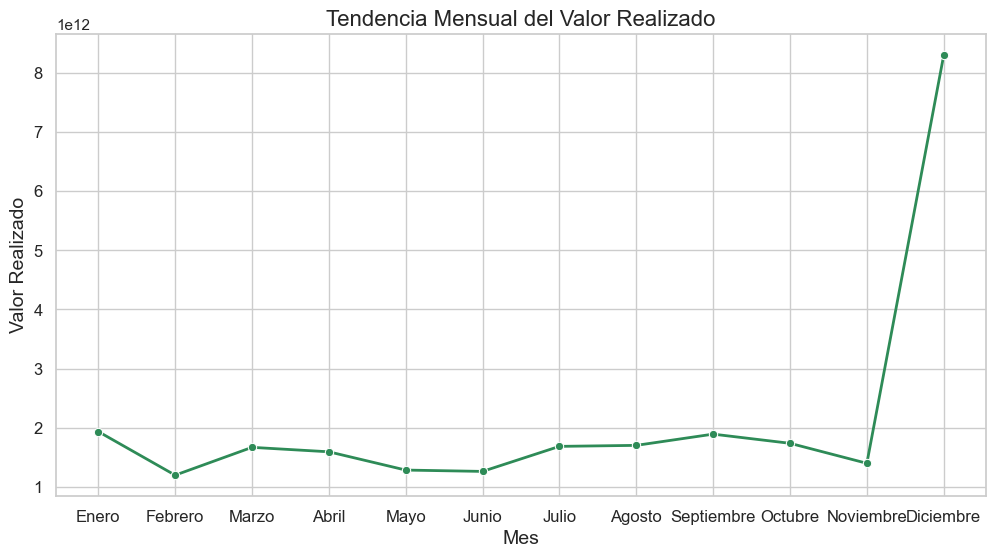

In [27]:
# Tendencias mensuales
df_consolidado['MES'] = pd.to_datetime(df_consolidado['FECHA LANZAMIENTO']).dt.month
df_tendencias_mensuales = df_consolidado.groupby('MES')['VALOR REALIZADO'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='MES', y='VALOR REALIZADO', data=df_tendencias_mensuales, marker="o", linewidth=2, color="seagreen")
plt.title("Tendencia Mensual del Valor Realizado", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Valor Realizado", fontsize=14)
plt.xticks(ticks=range(1, 13), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Tendencia mensual: Diciembre destaca con un valor extremadamente alto en comparación con otros meses, lo que sugiere que la mayor parte de la recaudación se concentra en el último mes del año. Este comportamiento podría estar relacionado con cierres fiscales o picos de ingresos en períodos específicos.

La tendencia mensual muestra un comportamiento atípico en diciembre, con una concentración significativa de los valores realizados. Esto podría deberse a:
Cierres fiscales de fin de año.
Ajustes administrativos o económicos para alcanzar objetivos anuales.
Este patrón puede ser útil para planificar estrategias de recaudación, pero también requiere análisis para evitar depender excesivamente de este período.

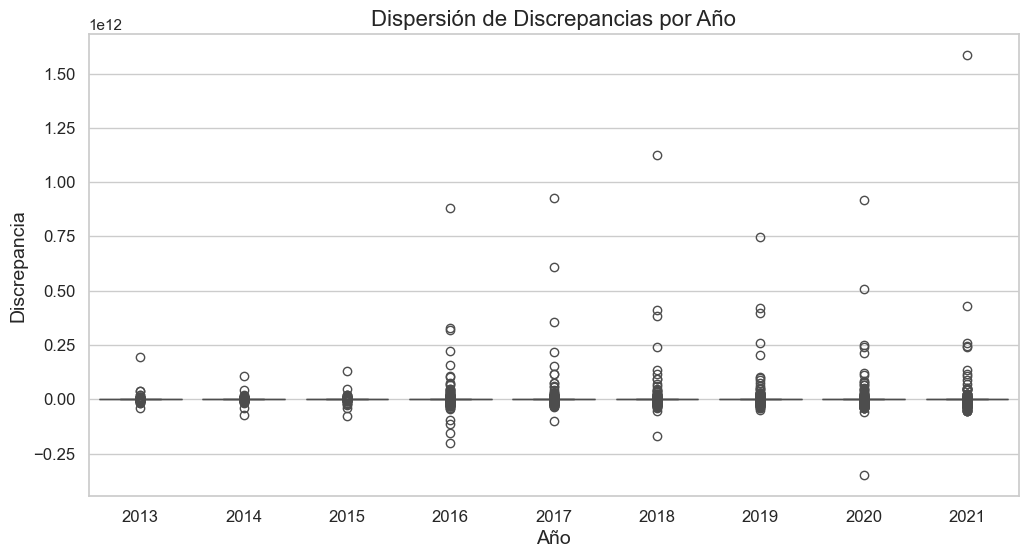

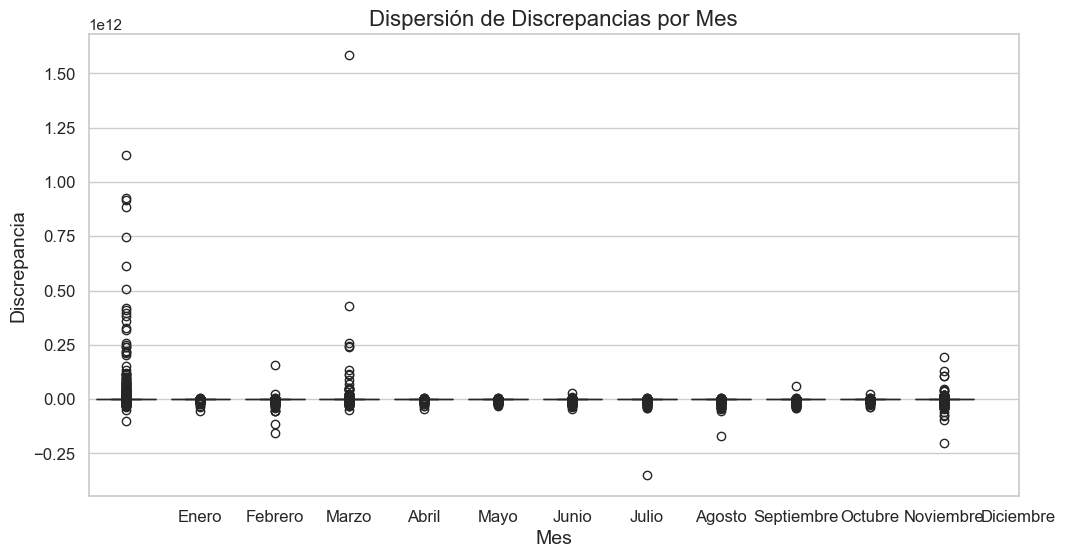

In [28]:
# Diagramas de caja para la dispersión de discrepancias
df_consolidado['DISCREPANCIA'] = df_consolidado['VALOR PREVISTO ACTUALIZADO'] - df_consolidado['VALOR REALIZADO']

plt.figure(figsize=(12, 6))
sns.boxplot(x='AÑO EJERCICIO', y='DISCREPANCIA', data=df_consolidado, color="orange")
plt.title("Dispersión de Discrepancias por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Discrepancia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='MES', y='DISCREPANCIA', data=df_consolidado, color="purple")
plt.title("Dispersión de Discrepancias por Mes", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Discrepancia", fontsize=14)
plt.xticks(ticks=range(1, 13), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], fontsize=12)
plt.yticks(fontsize=12)
plt.show()


- Por año: Hay una variabilidad significativa en las discrepancias a lo largo de los años. Algunos años, como 2016, muestran valores atípicos muy elevados, indicando grandes desviaciones entre lo previsto y lo realizado.
- Por mes: Marzo y diciembre presentan mayores dispersión de discrepancias, lo que podría estar vinculado a eventos económicos o administrativos específicos que afectan las previsiones.

El análisis de discrepancias evidencia que años como 2016 y meses como marzo presentan una dispersión elevada. Esto sugiere que las previsiones de ingresos no fueron suficientemente precisas, lo que podría deberse a eventos imprevistos o errores en la estimación.
Identificar las causas detrás de estas discrepancias puede ser clave para mejorar la planificación futura.

En los últimos años del análisis, las discrepancias parecen haberse reducido, lo que podría reflejar una mejora en los modelos de previsión y ejecución.


Matriz de correlación entre las variables numéricas:
                            VALOR PREVISTO ACTUALIZADO  VALOR LANZADO  \
VALOR PREVISTO ACTUALIZADO                    1.000000      -0.000053   
VALOR LANZADO                                -0.000053       1.000000   
VALOR REALIZADO                               0.368669      -0.000115   
DISCREPANCIA                                  0.910233      -0.000005   

                            VALOR REALIZADO  DISCREPANCIA  
VALOR PREVISTO ACTUALIZADO         0.368669      0.910233  
VALOR LANZADO                     -0.000115     -0.000005  
VALOR REALIZADO                    1.000000     -0.049352  
DISCREPANCIA                      -0.049352      1.000000  


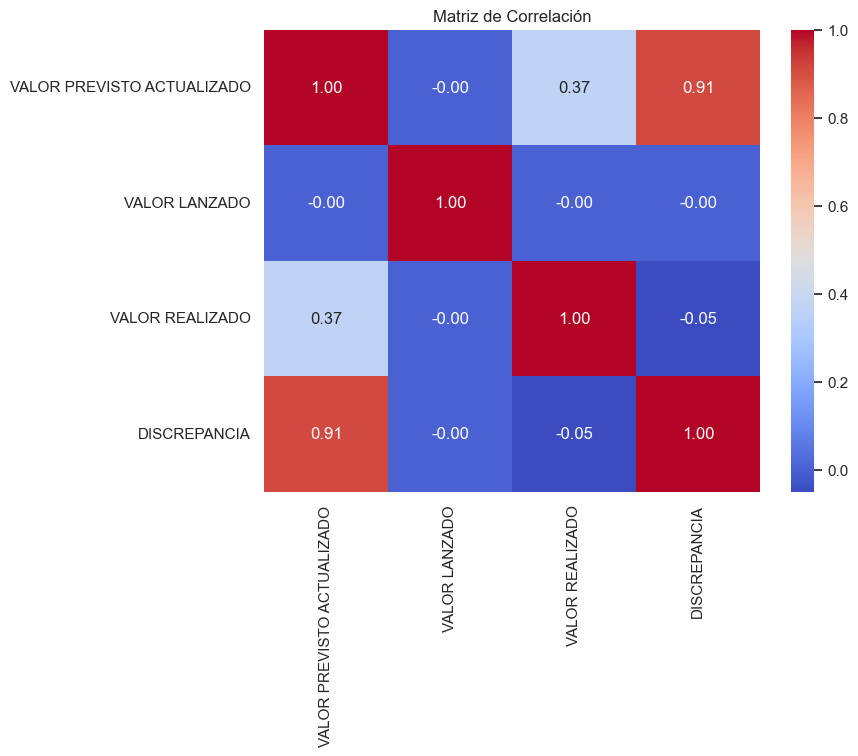

In [29]:
# Definir las variables numéricas que queremos analizar
variables_numericas = ['VALOR PREVISTO ACTUALIZADO', 'VALOR LANZADO', 'VALOR REALIZADO', 'DISCREPANCIA']

# Asegurarnos de que las columnas sean numéricas
for var in variables_numericas:
    df_consolidado[var] = pd.to_numeric(df_consolidado[var].astype(str).str.replace(',', '.'), errors='coerce')

#  Análisis de correlación entre las variables numéricas
print("\nMatriz de correlación entre las variables numéricas:")

# Asegurarnos de que las columnas sean numéricas
for var in variables_numericas:
    df_consolidado[var] = pd.to_numeric(df_consolidado[var].astype(str).str.replace(',', '.'), errors='coerce')

# Calcular la matriz de correlación
matriz_correlacion = df_consolidado[variables_numericas].corr()
print(matriz_correlacion)

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


- **VALOR PREVISTO ACTUALIZADO y DISCREPANCIA**
- Existe una correlación muy fuerte y positiva (0.91) entre estas dos variables. 
- Esto sugiere que las discrepancias tienden a ser mayores cuando los valores previstos son altos, lo cual podría deberse a una planificación presupuestaria que no se ajusta completamente a la realidad o a factores externos que afectan la recaudación.

- **Relación entre VALOR REALIZADO y VALOR PREVISTO ACTUALIZADO (correlación moderada y positiva: 0.37)**
- La planificación no está prediciendo con gran precisión lo que se recauda realmente. 
- Esto puede deberse a varios factores como cambios económicos, evasión fiscal, errores en las previsiones o incluso eventos inesperados como crisis económicas o políticas que afectan la recaudación.

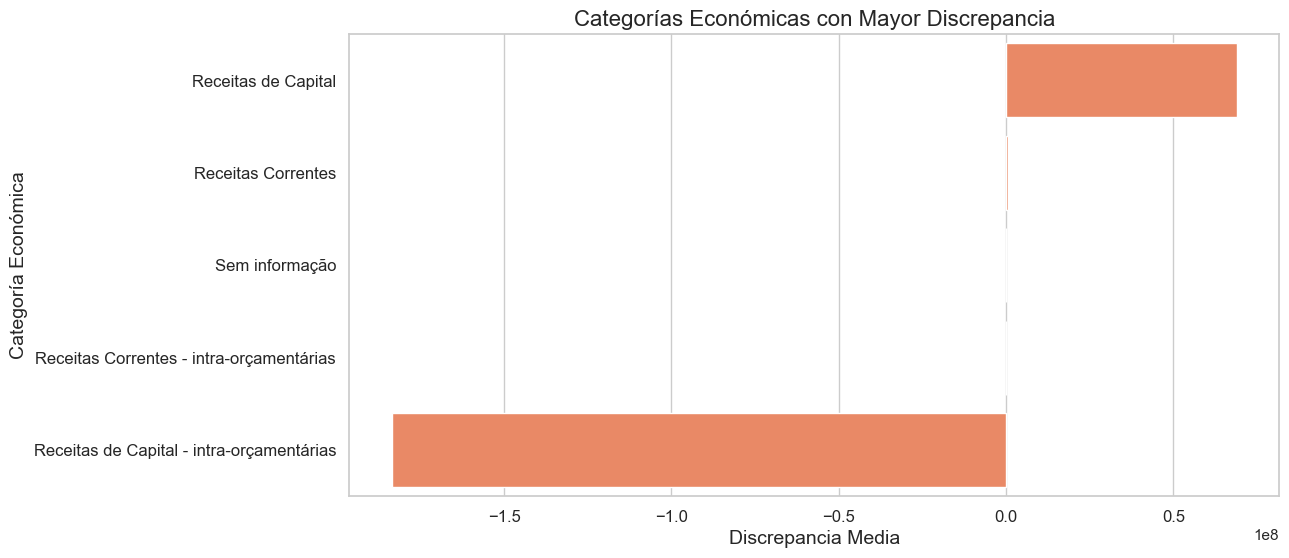

In [31]:
# Identificar las categorías económicas con mayores discrepancias
df_discrepancias_categorias = df_consolidado.groupby('CATEGORÍA ECONÓMICA')['DISCREPANCIA'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_discrepancias_categorias.values, y=df_discrepancias_categorias.index, color="coral")
plt.title("Categorías Económicas con Mayor Discrepancia", fontsize=16)
plt.xlabel("Discrepancia Media", fontsize=14)
plt.ylabel("Categoría Económica", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Receitas de Capital - Intra-Orçamentárias:**
Esta categoría tiene la discrepancia media más alta y negativa, indicando un subregistro significativo en comparación con lo previsto. Esto sugiere una ejecución ineficiente o problemas en la estimación inicial.



### CONCLUSIONES

El análisis muesta por un lado, que los valores realizados han mostrado una tendencia creciente a lo largo de los años, lo que indica un fortalecimiento en la capacidad de recaudación y gestión. Sin embargo, existen discrepancias significativas entre los valores previstos y realizados, lo que sugiere áreas de mejora en las proyecciones presupuestarias. A nivel mensual, diciembre destaca como un mes clave con picos de recaudación, probablemente debido al cierre del ejercicio fiscal, lo que evidencia una fuerte estacionalidad que debe ser tenida en cuenta para planificar estrategias más equilibradas a lo largo del año.


La dispersión observada en las discrepancias tanto a nivel anual como mensual, por su lado, resalta la necesidad de analizar más a fondo los factores que influyen en estas variaciones, como cambios económicos o administrativos.

Por ello, deberíamos focalizar la atención en esta categoría para investigar posibles causas: errores en la planificación, problemas en la recaudación o proyectos no ejecutados, etc...